<a href="https://colab.research.google.com/github/puliK121/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210 - 2023
# Final Project

This program brings together multiple data sources on asthma prevalence and mortality rates across different counties in california and years. It merges these datasets, cleans them, analyzes correlations, performs statistical tests, and visualizes the data in different ways like pivot tables, plots, and regression analysis.

The purose of this project is to:
1. Understand asthma prevalence and mortality trends across different demographics
2. Identifying counties with higher or lower than expected asthma rates based on other factors
3. Performs hypothesis tests like t-tests to compare groups

# Data Acquisition and Data Transformation - 1

Data Source 1- https://data.world/chhs/5ea28f96-7bb6-4c18-9c0d-020484fab181/workspace/file?filename=asthma-deaths-by-county.csv

This dataset contains asthma deaths by county level for california.

The Pandas library is imported and given the alias 'pd' for convenience. Pandas is a popular data analysis library in Python. Then a csv file called 'asthma.csv' is read into a DataFrame called 'asthma' using the pandas read_csv() function. the fillna() method is called on the asthma DataFrame to replace all missing values with 0. This imputes the missing data with a numeric value to avoid issues in subsequent analysis.the 'YEARS' column is specifically addressed. The replace() method is called to substitute all instances of "?" in the 'YEARS' column with a "-". This standardizes the representation of missing data in that column to dashes rather than question marks.

In [18]:
import pandas as pd

In [19]:
asthma = pd.read_csv("asthma.csv")
asthma.head(5)

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT
0,California,2014?2016,Total population,All ages,"1,181",9.6,NaN
1,Alameda,2014?2016,Total population,All ages,58,11.2,NaN
2,Alpine,2014?2016,Total population,All ages,0,0.0,NaN
3,Amador,2014?2016,Total population,All ages,0,0.0,NaN
4,Butte,2014?2016,Total population,All ages,7,NaN,Rate not available due to statistical instability


In [20]:
asthma = asthma.fillna(0)

In [21]:
# replacing "?" with "-" in YEARS
asthma['YEARS'] = asthma['YEARS'].str.replace('?', '-')
asthma.head(5)

<ipython-input-21-64405aae6787>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  asthma['YEARS'] = asthma['YEARS'].str.replace('?', '-')


,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT
0,California,2014-2016,Total population,All ages,"1,181",9.6,0
1,Alameda,2014-2016,Total population,All ages,58,11.2,0
2,Alpine,2014-2016,Total population,All ages,0,0.0,0
3,Amador,2014-2016,Total population,All ages,0,0.0,0
4,Butte,2014-2016,Total population,All ages,7,0.0,Rate not available due to statistical instability


# Data Acquisition and Data Trandormation - 2

Data source 2- https://data.world/chhs/01f456c3-db34-44f2-a52c-6811bef8ba6d/workspace/file?filename=chis-data-current-asthma-prevalence-by-county.xlsx

A new dataframe called asthma_current  is created by reading in an Excel file called "chis-data-current-asthma-prevalence-by-county.xlsx" using Pandas' read_excel() function. the drop() method is used on the asthma_current DataFrame to remove the column called "COUNTIES GROUPED". This drops or deletes that entire column from the DataFrame. Filling themissing values in the DataFrame by replacing them with 0 using the fillna() method, similar to the previous code example.

In [22]:
asthma_current = pd.read_excel("chis-data-current-asthma-prevalence-by-county.xlsx")
asthma_current.head(5)

,COUNTY,YEARS,STRATA,AGE GROUP,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL,COUNTIES GROUPED,COMMENT
0,California,2015–2016,Total population,All ages,0.086958,(8.1–9.3),NaN,NaN
1,Alameda,2015–2016,Total population,All ages,0.090542,(5.9–12.2),NaN,NaN
2,Alpine,2015–2016,Total population,All ages,0.093000,(4.1–14.6),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
3,Amador,2015–2016,Total population,All ages,0.093000,(4.1–14.6),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
4,Butte,2015–2016,Total population,All ages,0.094291,(3.8–15.1),NaN,Estimate is statistically unstable. Caution is...


In [23]:
asthma_current = asthma_current.drop(columns = "COUNTIES GROUPED")

In [24]:
asthma_current = asthma_current.fillna(0)
asthma_current.head(5)

,COUNTY,YEARS,STRATA,AGE GROUP,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL,COMMENT
0,California,2015–2016,Total population,All ages,0.086958,(8.1–9.3),0
1,Alameda,2015–2016,Total population,All ages,0.090542,(5.9–12.2),0
2,Alpine,2015–2016,Total population,All ages,0.093000,(4.1–14.6),0
3,Amador,2015–2016,Total population,All ages,0.093000,(4.1–14.6),0
4,Butte,2015–2016,Total population,All ages,0.094291,(3.8–15.1),Estimate is statistically unstable. Caution is...


# Data Acquisition and Data Transformation - 3

Data source 3- https://data.world/chhs/01f456c3-db34-44f2-a52c-6811bef8ba6d/workspace/file?filename=chis-data-lifetime-asthma-prevalence-by-county.xlsx

A new dataframe called asthma_lifetime is created by reading in a separate Excel file called "chis-data-lifetime-asthma-prevalence-by-county.xlsx" using Pandas' read_excel() function. Just like the previous example, the drop() method is used to remove the "COUNTIES GROUPED" column from this new DataFrame, as it is likely unnecessary for the analysis and the missing values are filled with 0 as done previously.

In [25]:
asthma_lifetime = pd.read_excel("chis-data-lifetime-asthma-prevalence-by-county.xlsx")
asthma_lifetime.head(5)

,COUNTY,YEARS,STRATA,AGE GROUP,LIFETIME PREVALENCE,95% CONFIDENCE INTERVAL,COUNTIES GROUPED,COMMENT
0,California,2015–2016,Total population,All ages,0.148000,(14.0–15.7),NaN,NaN
1,Alameda,2015–2016,Total population,All ages,0.142955,(10.7–17.9),NaN,NaN
2,Alpine,2015–2016,Total population,All ages,0.141582,(7.2–21.1),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
3,Amador,2015–2016,Total population,All ages,0.141582,(7.2–21.1),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
4,Butte,2015–2016,Total population,All ages,0.146952,(7.8–21.6),NaN,NaN


In [26]:
asthma_lifetime = asthma_lifetime.drop(columns = "COUNTIES GROUPED")

In [27]:
asthma_lifetime = asthma_lifetime.fillna(0)
asthma_lifetime.head(5)

,COUNTY,YEARS,STRATA,AGE GROUP,LIFETIME PREVALENCE,95% CONFIDENCE INTERVAL,COMMENT
0,California,2015–2016,Total population,All ages,0.148000,(14.0–15.7),0
1,Alameda,2015–2016,Total population,All ages,0.142955,(10.7–17.9),0
2,Alpine,2015–2016,Total population,All ages,0.141582,(7.2–21.1),0
3,Amador,2015–2016,Total population,All ages,0.141582,(7.2–21.1),0
4,Butte,2015–2016,Total population,All ages,0.146952,(7.8–21.6),0


# Data Acquistion 4

Data source 4- https://www.weather.gov/hnx/cafips

The data available in the website is extracted into a excel spreadsheet names "FIPS CODES" and then loaded into a dataframe name FIPS for furthe analysis

In [28]:
FIPS = pd.read_excel("FIPS CODES.xlsx")
FIPS.head(5)

,COUNTY,FIPS CODES
0,Alameda,6001
1,Alpine,6003
2,Amador,6005
3,Butte,6007
4,Calaveras,6009


# Merging of Datasets 1

Below, We are going to merge the "asthma" and "asthma_current" datasets.

a function called merge_asthma_dataset() is defined to take in two datasets (dataset1 and dataset2), a join key parameter that specifies the column(s) to merge on, and a merge type parameter (how) that defaults to a left join. Inside the function, the two datasets are merged using Pandas' merge() function. This merges dataset1 and dataset2 together using the column(s) specified in join_key to determine which rows match up between the two datasets. The type of join is determined by the how parameter.

Next, the merge_asthma_dataset() function is called using the asthma and asthma_current DataFrames that were imported and cleaned in the previous code snippets.It passes ['COUNTY', 'YEARS'] as the columns to join/merge on, implying that asthma rates data should be matched by unique combinations of COUNTY and YEARS between the datasets. The dataframes are merged using a left join, meaning all rows from the asthma dataframe (arg 1) will be included even if some rows do not match with asthma_current (arg 2).

In [29]:
def merge_asthma_dataset(dataset1, dataset2, join_key, how='left'):

    # Merge the two datasets on the join key
    merged_data = pd.merge(dataset1, dataset2, on=join_key, how=how)

    return merged_data

In [30]:
merged_data = merge_asthma_dataset(asthma, asthma_current, ['COUNTY','YEARS'], how='left')

In [31]:
merged_data

,COUNTY,YEARS,STRATA_x,AGE GROUP_x,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT_x,STRATA_y,AGE GROUP_y,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL,COMMENT_y
0,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN
1,Alameda,2014-2016,Total population,All ages,58,11.2,0,NaN,NaN,NaN,NaN,NaN
2,Alpine,2014-2016,Total population,All ages,0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,Amador,2014-2016,Total population,All ages,0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,Butte,2014-2016,Total population,All ages,7,0.0,Rate not available due to statistical instability,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
349,Tulare,2017-2019,Child vs. adult,18+ years,16,15.5,0,NaN,NaN,NaN,NaN,NaN
350,Tuolumne,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN
351,Ventura,2017-2019,Child vs. adult,18+ years,17,7.7,0,NaN,NaN,NaN,NaN,NaN
352,Yolo,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN


# Merging of Datasets 2

Below we are going to merge the above merged dataset with "asthma_lifestyle" dataset.
the merge_asthma_dataset() function is called again, this time using the existing merged_data DataFrame as the first input dataset.The second dataset passed to the function is the asthma_lifetime DataFrame imported and prepped earlier.

This time, the merge/join key is simply 'COUNTY' rather than 'COUNTY' and 'YEARS'. This indicates that the data should be matched at the county level between the two datasets.

The join type is again a left join, so all rows from the first DataFrame (merged_data) will be kept while matching in the county-level data from the asthma_lifetime DataFrame.

The result of this second merge is assigned back to merged_data, overwriting the previous version.

In [32]:
merged_data = merge_asthma_dataset(merged_data, asthma_lifetime, ['COUNTY'], how='left')
merged_data

,COUNTY,YEARS_x,STRATA_x,AGE GROUP_x,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT_x,STRATA_y,AGE GROUP_y,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL_x,COMMENT_y,YEARS_y,STRATA,AGE GROUP,LIFETIME PREVALENCE,95% CONFIDENCE INTERVAL_y,COMMENT
0,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Total population,All ages,0.148000,(14.0–15.7),0
1,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Child vs. adult,0–17 years,0.144909,(12.2–16.8),0
2,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Child vs. adult,18+ years,0.149445,(14.1–15.8),0
3,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Age groups,0–4 years,0.049289,(3.0–6.8),0
4,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Age groups,5–17 years,0.182016,(15.1–21.3),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Yuba,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN,2017–2018,Child vs. adult,18+ years,0.208667,(12.6–29.1),0
4952,Yuba,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN,2017–2018,Age groups,0–4 years,0.000000,0,Prevalence not available due to unreliable est...
4953,Yuba,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN,2017–2018,Age groups,5–17 years,0.000000,0,Prevalence not available due to unreliable est...
4954,Yuba,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN,2017–2018,Age groups,18–64 years,0.217592,(10.6–33.0),0


# Merging of Datasets 3

Below we are going to merge the above merged dataset with "FIPS" dataset. The merge_asthma_dataset() function again, passing in the merged_data DataFrame as the first argument dataset1.The second argument dataset2 is simply called FIPS. So presumably there is another DataFrame loaded elsewhere containing some sort of county FIPS code data.

The join/merge keys are once again 'COUNTY', implying that the goal is to match up rows by the county designation across both DataFrames.

The merge method is a left join - so retain all rows from the first DataFrame (merged_data) while pulling in any matching county FIPS code data from the second FIPS DataFrame if available.

The merged output is reassigned back to merged_data, overwriting the prior data.

In [33]:
merged_data = merge_asthma_dataset(merged_data, FIPS, 'COUNTY', how = 'left')
merged_data

,COUNTY,YEARS_x,STRATA_x,AGE GROUP_x,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT_x,STRATA_y,AGE GROUP_y,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL_x,COMMENT_y,YEARS_y,STRATA,AGE GROUP,LIFETIME PREVALENCE,95% CONFIDENCE INTERVAL_y,COMMENT,FIPS CODES
0,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Total population,All ages,0.148000,(14.0–15.7),0,NaN
1,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Child vs. adult,0–17 years,0.144909,(12.2–16.8),0,NaN
2,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Child vs. adult,18+ years,0.149445,(14.1–15.8),0,NaN
3,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Age groups,0–4 years,0.049289,(3.0–6.8),0,NaN
4,California,2014-2016,Total population,All ages,"1,181",9.6,0,NaN,NaN,NaN,NaN,NaN,2015–2016,Age groups,5–17 years,0.182016,(15.1–21.3),0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Yuba,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN,2017–2018,Child vs. adult,18+ years,0.208667,(12.6–29.1),0,6115.0
4952,Yuba,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN,2017–2018,Age groups,0–4 years,0.000000,0,Prevalence not available due to unreliable est...,6115.0
4953,Yuba,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN,2017–2018,Age groups,5–17 years,0.000000,0,Prevalence not available due to unreliable est...,6115.0
4954,Yuba,2017-2019,Child vs. adult,18+ years,0,0.0,Count and rate suppressed in accordance with d...,NaN,NaN,NaN,NaN,NaN,2017–2018,Age groups,18–64 years,0.217592,(10.6–33.0),0,6115.0


# Transformations of Merged_Dataset

The merged_data DataFrame that was built up through multiple merge operations is assigned to a new name asthma_merged.

Then, the drop() method is used to remove a specific set of columns from asthma_merged:

"STRATA_x",
"AGE GROUP_x",
"COMMENT_x",
"STRATA_y",
"AGE GROUP_y",
"COMMENT_y",
"CURRENT PREVALENCE",
"95% CONFIDENCE INTERVAL_x"].
Based on the column names, these appear to be duplicate or interim columns that were carried through some of the merges but are likely not needed for the final analysis.

Dropping them cleans up the DataFrame and removes unnecessary data cruft.

In [34]:
asthma_merged = merged_data.drop(columns = ["STRATA_x","AGE GROUP_x", "COMMENT_x", "STRATA_y","AGE GROUP_y","COMMENT_y"])
asthma_merged

,COUNTY,YEARS_x,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL_x,YEARS_y,STRATA,AGE GROUP,LIFETIME PREVALENCE,95% CONFIDENCE INTERVAL_y,COMMENT,FIPS CODES
0,California,2014-2016,"1,181",9.6,NaN,NaN,2015–2016,Total population,All ages,0.148000,(14.0–15.7),0,NaN
1,California,2014-2016,"1,181",9.6,NaN,NaN,2015–2016,Child vs. adult,0–17 years,0.144909,(12.2–16.8),0,NaN
2,California,2014-2016,"1,181",9.6,NaN,NaN,2015–2016,Child vs. adult,18+ years,0.149445,(14.1–15.8),0,NaN
3,California,2014-2016,"1,181",9.6,NaN,NaN,2015–2016,Age groups,0–4 years,0.049289,(3.0–6.8),0,NaN
4,California,2014-2016,"1,181",9.6,NaN,NaN,2015–2016,Age groups,5–17 years,0.182016,(15.1–21.3),0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Yuba,2017-2019,0,0.0,NaN,NaN,2017–2018,Child vs. adult,18+ years,0.208667,(12.6–29.1),0,6115.0
4952,Yuba,2017-2019,0,0.0,NaN,NaN,2017–2018,Age groups,0–4 years,0.000000,0,Prevalence not available due to unreliable est...,6115.0
4953,Yuba,2017-2019,0,0.0,NaN,NaN,2017–2018,Age groups,5–17 years,0.000000,0,Prevalence not available due to unreliable est...,6115.0
4954,Yuba,2017-2019,0,0.0,NaN,NaN,2017–2018,Age groups,18–64 years,0.217592,(10.6–33.0),0,6115.0


In [35]:
asthma_merged.isna().sum()

COUNTY                            0
YEARS_x                           0
NUMBER OF DEATHS                  0
AGE-ADJUSTED MORTALITY RATE       0
CURRENT PREVALENCE             4956
95% CONFIDENCE INTERVAL_x      4956
YEARS_y                           0
STRATA                            0
AGE GROUP                         0
LIFETIME PREVALENCE               0
95% CONFIDENCE INTERVAL_y         0
COMMENT                           0
FIPS CODES                      252
dtype: int64

In [36]:
asthma_merged1 = asthma_merged.drop(columns = ["CURRENT PREVALENCE", "95% CONFIDENCE INTERVAL_x"])

In [37]:
asthma_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4956 entries, 0 to 4955
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTY                       4956 non-null   object 
 1   YEARS_x                      4956 non-null   object 
 2   NUMBER OF DEATHS             4956 non-null   object 
 3   AGE-ADJUSTED MORTALITY RATE  4956 non-null   float64
 4   YEARS_y                      4956 non-null   object 
 5   STRATA                       4956 non-null   object 
 6   AGE GROUP                    4956 non-null   object 
 7   LIFETIME PREVALENCE          4956 non-null   float64
 8   95% CONFIDENCE INTERVAL_y    4956 non-null   object 
 9   COMMENT                      4956 non-null   object 
 10  FIPS CODES                   4704 non-null   float64
dtypes: float64(3), object(8)
memory usage: 464.6+ KB


# Pivoting and Plotting
First, a pivot_data() function is defined to take a dataframe and pivot it on certain columns into a pivot table.
Next, some parameters are defined for the pivot operation:

index: the columns that will make up the index/rows of the pivot table
values: the column that contains the cell values in the pivot table
pivot: the column to use for the column index in the pivot table
The function is called on the asthma_merged dataframe to pivot the 'LIFETIME PREVALENCE' values across 'COUNTY', 'YEARS' groups and using 'STRATA' for the column index. This pivoted data is assigned to pivot1.

Matplotlib is imported and a line plot is created using pivot1, with markers and larger figure size configured.

Some titles, axis labels, legend title are added to the plot for clarity.

The legend is positioned outside the plot and the plot is displayed.

In [38]:
def pivot_data(df, index, values, pivot):
    pivoted = df.pivot_table(index=index, columns=pivot, values=values)
    return pivoted

In [39]:
index = ['COUNTY', 'YEARS_x', 'NUMBER OF DEATHS', 'AGE-ADJUSTED MORTALITY RATE']
values = ['LIFETIME PREVALENCE']
pivot = 'STRATA'

In [40]:
pivot1 = pivot_data(asthma_merged, index, values, pivot)
pivot1

LIFETIME PREVALENCE  \
STRATA                                                                  Age groups   
COUNTY  YEARS_x   NUMBER OF DEATHS AGE-ADJUSTED MORTALITY RATE                       
Alameda 2014-2016 0                0.0                                    0.117010   
                  58               11.2                                   0.117010   
                                   15.1                                   0.117010   
        2017-2019 0                0.0                                    0.117010   
                  67               12.0                                   0.117010   
...                                                                            ...   
Yolo    2017-2019 0                0.0                                    0.062102   
Yuba    2014-2016 0                0.0                                    0.104029   
                                   0.0                                    0.104029   
        2017-2019 0                0.0                                    0.104029   
                                   0.0                                    0.104029   

                                                                                \
STRATA                                                         Child vs. adult   
COUNTY  YEARS_x   NUMBER OF DEATHS AGE-ADJUSTED MORTALITY RATE                   
Alameda 2014-2016 0                0.0                                0.150994   
                  58               11.2                               0.150994   
                                   15.1                               0.150994   
        2017-2019 0                0.0                                0.150994   
                  67               12.0                               0.150994   
...                                                                        ...   
Yolo    2017-2019 0                0.0                                0.097091   
Yuba    2014-2016 0                0.0                                0.105665   
                                   0.0                                0.105665   
        2017-2019 0                0.0                                0.105665   
                                   0.0                                0.105665   

                                                                                 
STRATA                                                         Total population  
COUNTY  YEARS_x   NUMBER OF DEATHS AGE-ADJUSTED MORTALITY RATE                   
Alameda 2014-2016 0                0.0                                 0.140380  
                  58               11.2                                0.140380  
                                   15.1                                0.140380  
        2017-2019 0                0.0                                 0.140380  
                  67               12.0                                0.140380  
...                                                                         ...  
Yolo    2017-2019 0                0.0                                 0.182920  
Yuba    2014-2016 0                0.0                                 0.191708  
                                   0.0                                 0.191708  
        2017-2019 0                0.0                                 0.191708  
                                   0.0                                 0.191708  

[268 rows x 3 columns]

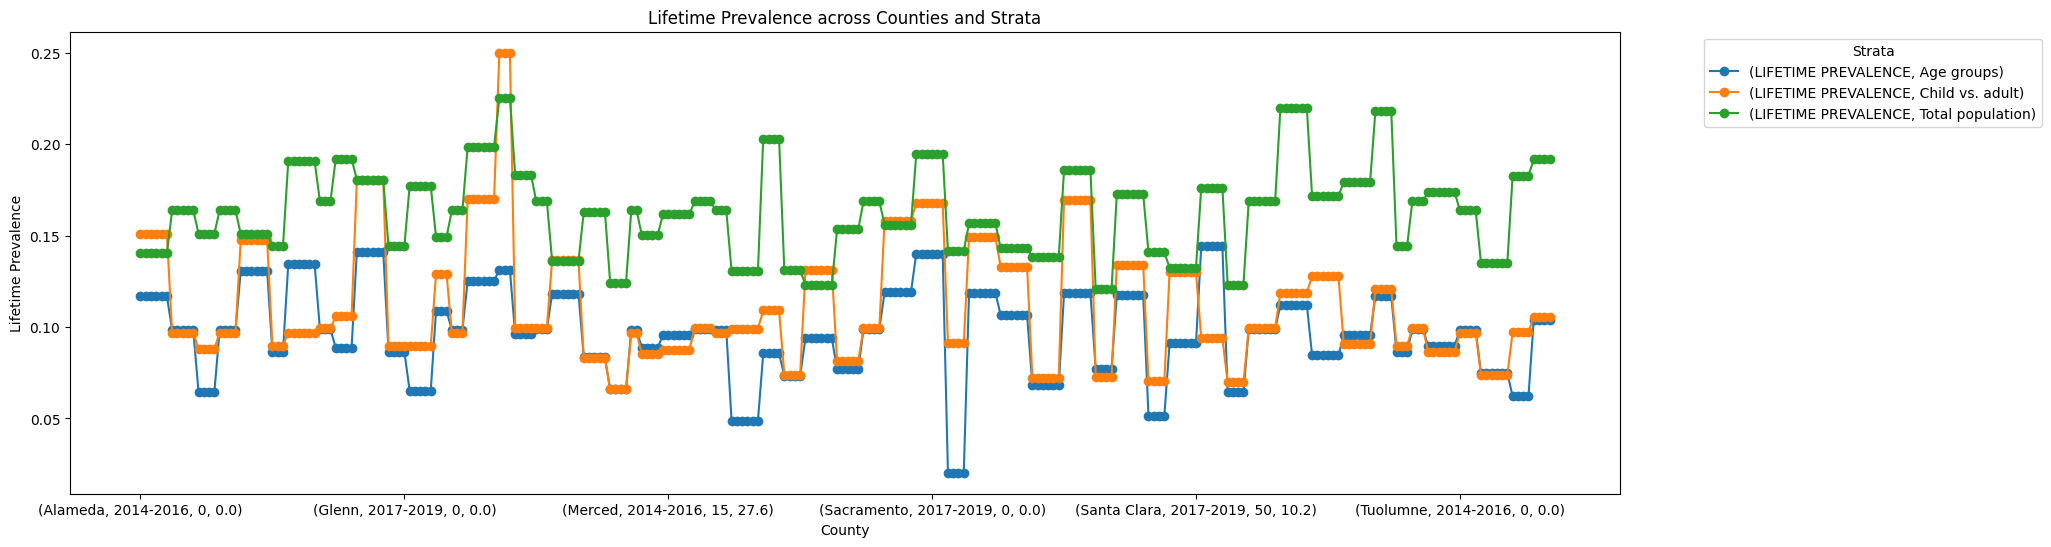

In [41]:
import matplotlib.pyplot as plt
ax = pivot1.plot(kind='line', marker='o', figsize=(20, 6))
ax.set_title('Lifetime Prevalence across Counties and Strata')
ax.set_xlabel('County')
ax.set_ylabel('Lifetime Prevalence')
ax.legend(title='Strata', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [42]:
#converting the datatype from object to float
asthma_merged1['95% CONFIDENCE INTERVAL_y'] = asthma_merged1['95% CONFIDENCE INTERVAL_y'].apply(lambda x: pd.to_numeric(str(x).split('–')[0], errors='coerce') if pd.notna(x) else x)
asthma_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4956 entries, 0 to 4955
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTY                       4956 non-null   object 
 1   YEARS_x                      4956 non-null   object 
 2   NUMBER OF DEATHS             4956 non-null   object 
 3   AGE-ADJUSTED MORTALITY RATE  4956 non-null   float64
 4   YEARS_y                      4956 non-null   object 
 5   STRATA                       4956 non-null   object 
 6   AGE GROUP                    4956 non-null   object 
 7   LIFETIME PREVALENCE          4956 non-null   float64
 8   95% CONFIDENCE INTERVAL_y    1848 non-null   float64
 9   COMMENT                      4956 non-null   object 
 10  FIPS CODES                   4704 non-null   float64
dtypes: float64(4), object(7)
memory usage: 464.6+ KB


In [43]:
index_columns = ['COUNTY', 'YEARS_x', 'NUMBER OF DEATHS', 'AGE-ADJUSTED MORTALITY RATE', 'YEARS_y', 'STRATA', 'AGE GROUP', 'COMMENT', 'FIPS CODES']
values_columns = ['LIFETIME PREVALENCE', '95% CONFIDENCE INTERVAL_y']

# Pivot the data
pivot2 = pivot_data(asthma_merged1, index_columns, values_columns, 'STRATA')

# Display the pivoted DataFrame
pivot2

95% CONFIDENCE INTERVAL_y  \
STRATA                                                                                                                                                                             Age groups   
COUNTY  YEARS_x   NUMBER OF DEATHS AGE-ADJUSTED MORTALITY RATE YEARS_y   STRATA           AGE GROUP   COMMENT                                            FIPS CODES                             
Alameda 2014-2016 0                0.0                         2015–2016 Age groups       0–4 years   Prevalence not available due to unreliable esti... 6001.0                           0.0   
                                                                                          18–64 years 0                                                  6001.0                           NaN   
                                                                                          5–17 years  Estimate is statistically unstable. Caution is ... 6001.0                           NaN   
                                                                                          65+ years   Estimate is statistically unstable. Caution is ... 6001.0                           NaN   
                                                                         Child vs. adult  0–17 years  Estimate is statistically unstable. Caution is ... 6001.0                           NaN   
...                                                                                                                                                                                       ...   
Yuba    2017-2019 0                0.0                         2017–2018 Age groups       5–17 years  Prevalence not available due to unreliable esti... 6115.0                           0.0   
                                                                                          65+ years   Estimate is statistically unstable. Caution is ... 6115.0                           NaN   
                                                                         Child vs. adult  0–17 years  Prevalence not available due to unreliable esti... 6115.0                           NaN   
                                                                                          18+ years   0                                                  6115.0                           NaN   
                                                                         Total population All ages    0                                                  6115.0                           NaN   

                                                                                                                                                                                     \
STRATA                                                                                                                                                              Child vs. adult   
COUNTY  YEARS_x   NUMBER OF DEATHS AGE-ADJUSTED MORTALITY RATE YEARS_y   STRATA           AGE GROUP   COMMENT                                            FIPS CODES                   
Alameda 2014-2016 0                0.0                         2015–2016 Age groups       0–4 years   Prevalence not available due to unreliable esti... 6001.0                 NaN   
                                                                                          18–64 years 0                                                  6001.0                 NaN   
                                                                                          5–17 years  Estimate is statistically unstable. Caution is ... 6001.0                 NaN   
                                                                                          65+ years   Estimate is statistically unstable. Caution is ... 6001.0                 NaN   
                                                                         Child vs. adult  0–17 years  Estimate is statistically unstable. Caution is ... 6001.0                 NaN 

# Data Aggregation and Plotting

First, it converts the 'NUMBER OF DEATHS' column to numeric values using pd.to_numeric() and errors='coerce' to handle any non-numeric data.

Next, it aggregates the data using .groupby() on ['COUNTY', 'YEARS_x']. This groups the rows by the unique combinations of County and Year. The aggregations calculate:

'sum' of 'NUMBER OF DEATHS'
'mean' of 'AGE-ADJUSTED MORTALITY RATE'
'mean' of 'LIFETIME PREVALENCE'
The aggregated data is reset back into a clean DataFrame.

A plot is created showing the total number of deaths for each County x Year group using a bar chart.

Next, just the numeric columns of the aggregated DataFrame are selected and a correlation matrix is calculated.

Finally, a heatmap visualization of the correlation matrix is producing using Seaborn's heatmap() function.

In [44]:
asthma_merged['NUMBER OF DEATHS'] = pd.to_numeric(asthma_merged['NUMBER OF DEATHS'], errors='coerce')

# Aggregate the data
aggregated_data = asthma_merged.groupby(['COUNTY', 'YEARS_x']).agg({
    'NUMBER OF DEATHS': 'sum',
    'AGE-ADJUSTED MORTALITY RATE': 'mean',
    'LIFETIME PREVALENCE': 'mean'
}).reset_index()

In [45]:
aggregated_data

,COUNTY,YEARS_x,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,LIFETIME PREVALENCE
0,Alameda,2014-2016,1624.0,8.766667,0.130058
1,Alameda,2017-2019,1876.0,9.366667,0.130058
2,Alpine,2014-2016,0.0,0.000000,0.107318
3,Alpine,2017-2019,0.0,0.000000,0.107318
4,Amador,2014-2016,0.0,0.000000,0.107318
...,...,...,...,...,...
113,Ventura,2017-2019,476.0,4.500000,0.083250
114,Yolo,2014-2016,0.0,0.000000,0.089359
115,Yolo,2017-2019,0.0,0.000000,0.089359
116,Yuba,2014-2016,0.0,0.000000,0.117022


# Total Number of Deaths by County and Years

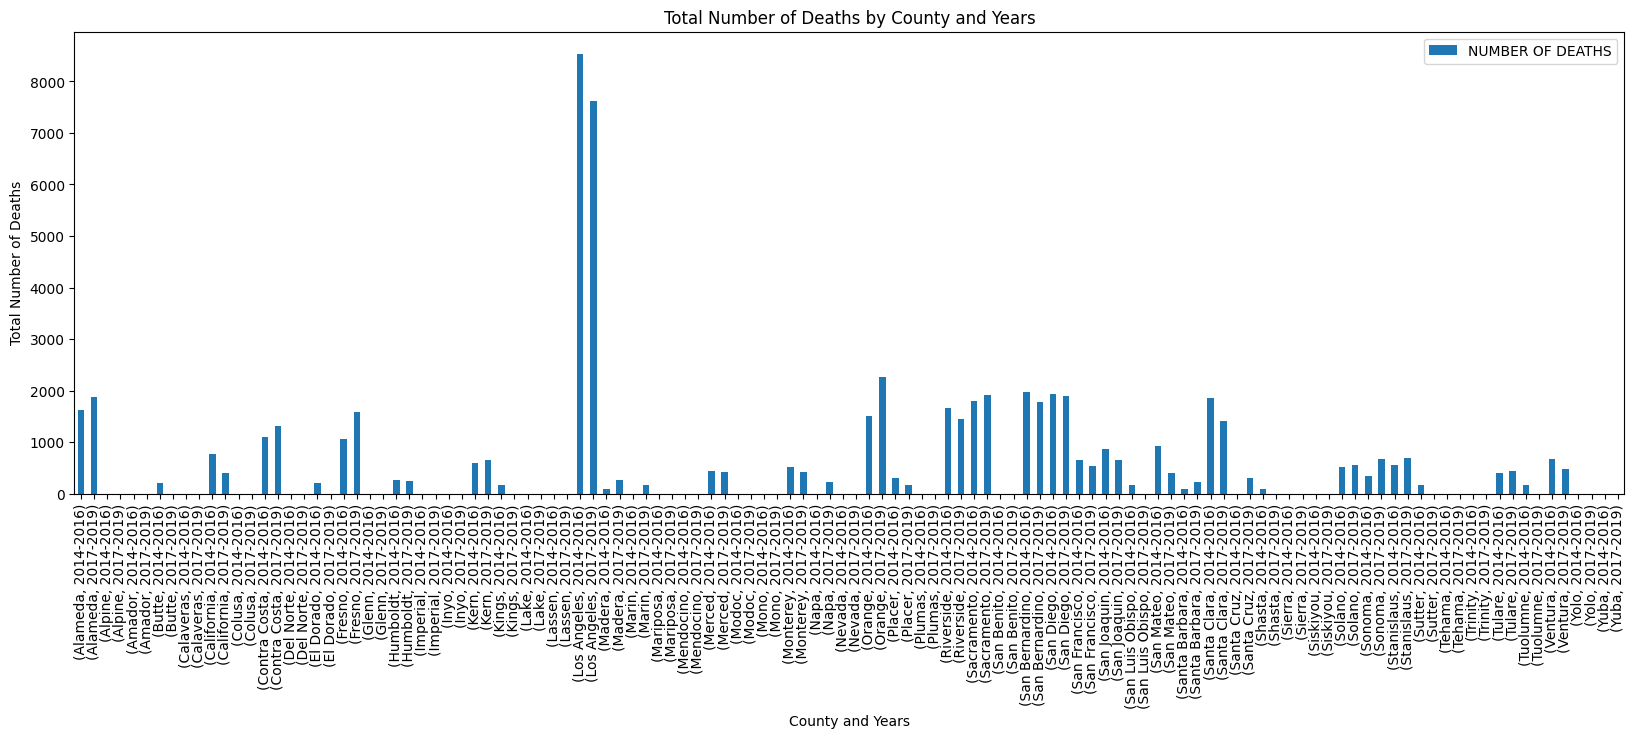

In [46]:
aggregated_data.set_index(['COUNTY', 'YEARS_x'])['NUMBER OF DEATHS'].plot(kind='bar', legend=True)
plt.title('Total Number of Deaths by County and Years')
plt.xlabel('County and Years')
plt.ylabel('Total Number of Deaths')
plt.gcf().set_size_inches(20, 6)  # Set the figure size
plt.show()

# Correlation Matrix and Heat Map

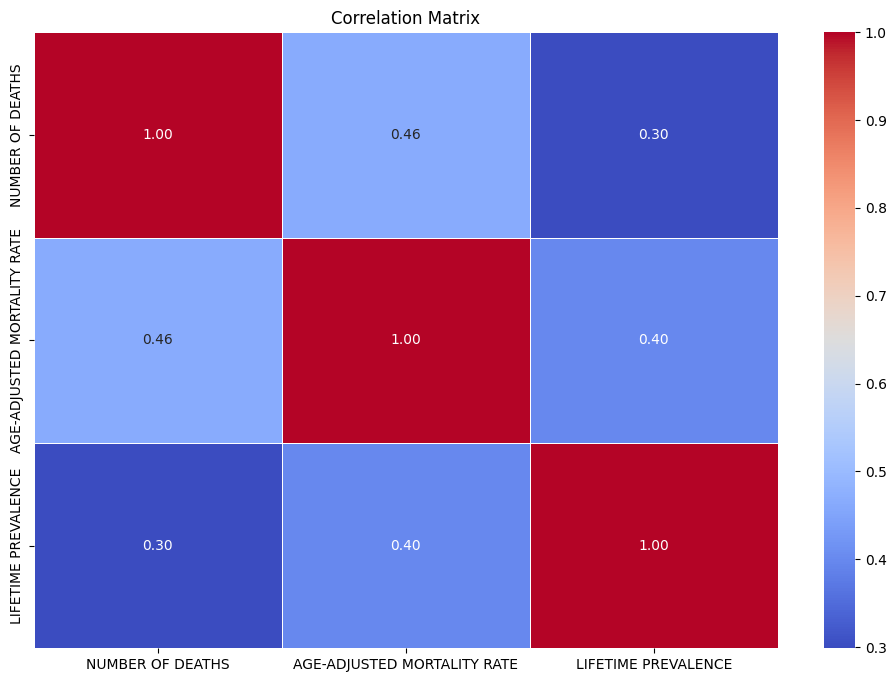

In [47]:
numeric_columns = aggregated_data.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
# Plot the correlation matrix using seaborn
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation Tests

This code is performing statistical correlation tests between two columns from the aggregated dataset: 'LIFETIME PREVALENCE' and 'AGE-ADJUSTED MORTALITY RATE'.

First, the values for those two columns are extracted into separate variables.

Next, Pearson's and Spearman's correlation tests are conducted using SciPy functions to test if there is a relationship between the prevalence and mortality rate variables.

The correlation coefficients and p-values are printed for both tests.

Then, the p-values are evaluated against a defined alpha significance level of 0.05 to determine if the correlations are statistically significant.

Both the Pearson and Spearman correlations are determined to be significant based on having p-values less than the 0.05 alpha.

In [48]:
from scipy.stats import pearsonr, spearmanr

# Example: Testing correlation between 'LIFETIME PREVALENCE' and 'AGE-ADJUSTED MORTALITY RATE'
lifetime_prevalence = aggregated_data['LIFETIME PREVALENCE']
mortality_rate = aggregated_data['AGE-ADJUSTED MORTALITY RATE']

# Pearson Correlation Test
pearson_coefficient, pearson_p_value = pearsonr(lifetime_prevalence, mortality_rate)
print(f'Pearson Correlation Coefficient: {pearson_coefficient}')
print(f'P-Value: {pearson_p_value}')

# Spearman Rank Correlation Test
spearman_coefficient, spearman_p_value = spearmanr(lifetime_prevalence, mortality_rate)
print(f'Spearman Rank Correlation Coefficient: {spearman_coefficient}')
print(f'P-Value: {spearman_p_value}')

# Interpret the results
alpha = 0.05  # Set your significance level

# Pearson test interpretation
if pearson_p_value < alpha:
    print("The Pearson correlation is statistically significant.")
else:
    print("There is no significant Pearson correlation.")

# Spearman test interpretation
if spearman_p_value < alpha:
    print("The Spearman correlation is statistically significant.")
else:
    print("There is no significant Spearman correlation.")

Pearson Correlation Coefficient: 0.39794580099080695
P-Value: 8.100162025373245e-06
Spearman Rank Correlation Coefficient: 0.37838302968126164
P-Value: 2.3924150178044527e-05
The Pearson correlation is statistically significant.
The Spearman correlation is statistically significant.


# Two Sample T-test and Plotting

This code is performing a two-sample t-test to compare the lifetime asthma prevalence between two groups:

Counties with deaths (Group A)
Counties without deaths (Group B)
It first filters the aggregated dataframe into two subsets based on whether the 'NUMBER OF DEATHS' is 0 or not.

Next, SciPy's t-test function is used to test if the mean lifetime prevalence differs significantly between the groups.

The t-statistic and p-value are printed, which can determine if the difference is significant based on a threshold.

Finally, plots are created showing the distribution of lifetime prevalence percentages for each group using Seaborn's histogram.

The second snippet does the same process but compares counties with non-zero 'AGE-ADJUSTED MORTALITY RATE' vs counties with zero mortality rate.

This allows both statistical tests and visual inspection to determine if lifetime asthma prevalence differs based on either asthma deaths or mortality rates within a county. The confidence in any differences or relationships is quantified through the statistical significance testing.

T-Statistic: 2.4740934195160293
P-Value: 0.014914834083446165


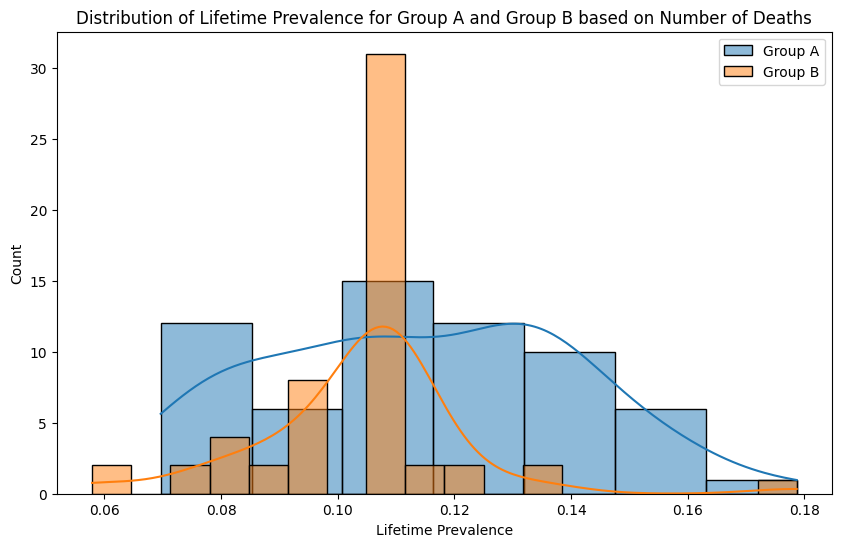

In [49]:
from scipy.stats import ttest_ind
group_a_data = aggregated_data[aggregated_data['NUMBER OF DEATHS'] != 0]['LIFETIME PREVALENCE']
group_b_data = aggregated_data[aggregated_data['NUMBER OF DEATHS'] == 0]['LIFETIME PREVALENCE']

# Perform t-test
t_statistic, p_value = ttest_ind(group_a_data, group_b_data, equal_var=False, nan_policy='omit')

# Display results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.histplot(group_a_data, label='Group A', kde=True)
sns.histplot(group_b_data, label='Group B', kde=True)
plt.title('Distribution of Lifetime Prevalence for Group A and Group B based on Number of Deaths')
plt.xlabel('Lifetime Prevalence')
plt.legend()
plt.show()

T-Statistic: 4.262199508631505
P-Value: 5.365884094884361e-05


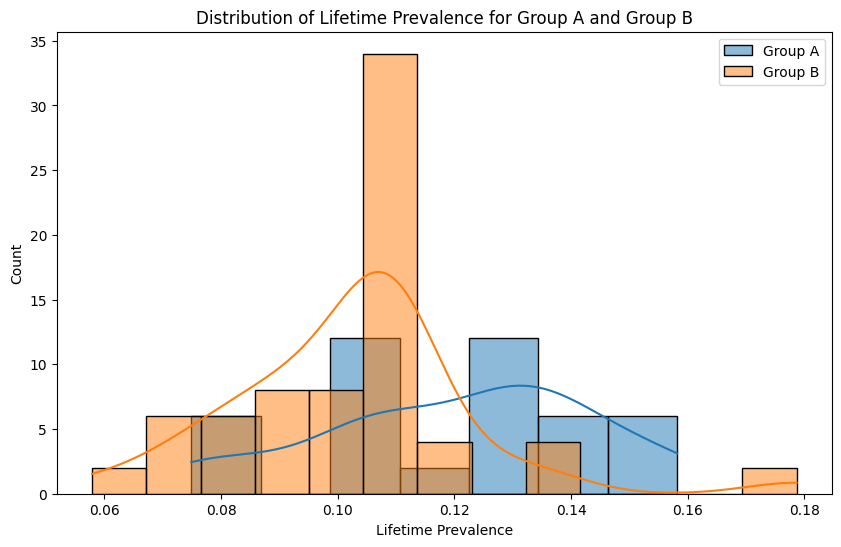

In [50]:
from scipy.stats import ttest_ind
group_a_data = aggregated_data[aggregated_data['AGE-ADJUSTED MORTALITY RATE'] != 0]['LIFETIME PREVALENCE']
group_b_data = aggregated_data[aggregated_data['AGE-ADJUSTED MORTALITY RATE'] == 0]['LIFETIME PREVALENCE']

# Perform t-test
t_statistic, p_value = ttest_ind(group_a_data, group_b_data, equal_var=False, nan_policy='omit')

# Display results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.histplot(group_a_data, label='Group A', kde=True)
sns.histplot(group_b_data, label='Group B', kde=True)
plt.title('Distribution of Lifetime Prevalence for Group A and Group B')
plt.xlabel('Lifetime Prevalence')
plt.legend()
plt.show()

# Regression Line with Confidence Band

This code creates a regression plot with a 95% confidence band between the 'AGE-ADJUSTED MORTALITY RATE' and 'LIFETIME PREVALENCE' columns in the aggregated DataFrame.

A figure is created and seaborn's regplot() function is used to plot the regression relationship between the two columns, with scatter plot points overlayed.

Some customizations:

1. The scatter points are made larger with scatter_kws
2. A 95% confidence band is enabled to show the reliability of the regression fit
3. Titles and axis labels are added for clarity

This visualizes the correlation we previously tested statistically. The regression line shows the trend between mortality rate and lifetime prevalence, while the confidence band indicates how precise the estimated regression line is based on the aggregated data.

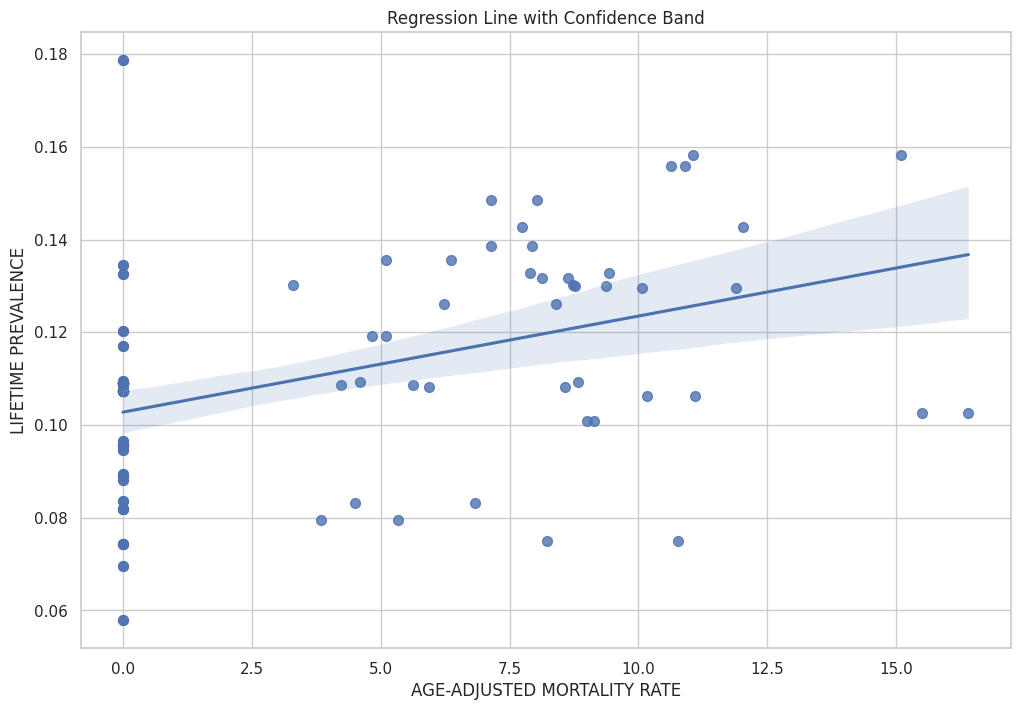

In [51]:
sns.set(style="whitegrid")

# Plot regression line with confidence band
plt.figure(figsize=(12, 8))
sns.regplot(x='AGE-ADJUSTED MORTALITY RATE', y='LIFETIME PREVALENCE', data=aggregated_data, scatter_kws={'s': 50}, ci=95)
plt.title('Regression Line with Confidence Band')
plt.xlabel('AGE-ADJUSTED MORTALITY RATE')
plt.ylabel('LIFETIME PREVALENCE')
plt.show()

# Conclusion

Based on the analysis done in this project, here are some key conclusions:

1. Both Pearson and Spearman correlation tests showed statistically significant positive correlations between lifetime asthma prevalence and the age-adjusted mortality rate. This indicates that counties with higher asthma prevalence also tend to have higher mortality rates.
2. The two-sample t-tests comparing counties with deaths vs no deaths and counties with non-zero mortality rate vs zero rate found significant differences in mean lifetime prevalence between the groups. Counties with deaths and non-zero mortality had significantly higher lifetime prevalence percentages on average.
3. The visualizations and regression analysis further validate the numeric relationships uncovered through the statistical tests. There are clear trends relating higher prevalence to higher mortality rates, as well as differences in prevalence based on having deaths/non-zero rates or not.
4. Therefore, key takeaways are that asthma prevalence and mortality rates are positively related within counties, and counties that have measured deaths and non-zero mortality exhibit notably higher lifetime asthma rates across their populations. These connections could help inform public health efforts and identify regions most in need of intervention to reduce asthma prevalence and severity.

In summary, the hypothesis testing validated significant relationships between factors, while visualization and modeling supplemented the statistical findings to provide a thorough quantification and analysis of asthma trends across demographics and counties.